<a href="https://colab.research.google.com/github/dondreojordan/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module4-clustering/LS_DS_134_Clustering_and_NFL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

# 1) Use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

#NEED TO KNOW THOROUGHLY.NEED TO KNOW THOROUGHLY.NEED TO KNOW THOROUGHLY

Memorize This!

Supervised: Labelled outputs

Classification: Discrete output cagetories
Regression: Continuous output values
Unsupervised: Outputs are not labelled

Reinforcement: Rewards/punishments for "behaviors"

#NEED TO KNOW THOROUGHLY. NEED TO KNOW THOROUGHLY. NEED TO KNOW THOROUGHLY

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df.shape)
df.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

In [11]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [55]:
# Look at datatypes
# a lot of object datatypes even though they seem to be strings of numbers.
df.dtypes

radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst       float64
symmetry_worst      

In [28]:
df = df.drop(['diagnosis', 'id', "Unnamed: 32"], axis=1)
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Let's do it!

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to use the elbow method to decide on the number of clusters to use.


In [ ]:
print("Numerical: ",df.describe)
print("Possible Nan Values: ",df.replace({'?', np.nan}).isnull().sum())
print("True/False?",df.isnull().sum().any())
print("Modified Dataframe: ",df.head)

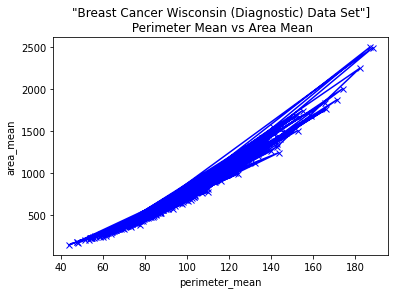

In [39]:
plt.plot(df['perimeter_mean'], df['area_mean'], 'bx-')
plt.xlabel('perimeter_mean')
plt.ylabel('area_mean')
plt.title('"Breast Cancer Wisconsin (Diagnostic) Data Set"]\n Perimeter Mean vs Area Mean')
plt.show()

Text(0.5, 1.0, '"Breast Cancer Wisconsin (Diagnostic) Data Set"\n Perimeter Worst vs Area Worst')

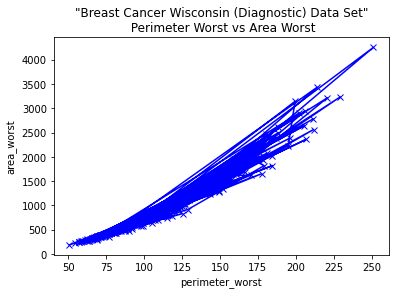

In [53]:
plt.plot(df['perimeter_worst'], df['area_worst'], 'bx-')
plt.xlabel('perimeter_worst')
plt.ylabel('area_worst')
plt.title('"Breast Cancer Wisconsin (Diagnostic) Data Set"\n Perimeter Worst vs Area Worst')

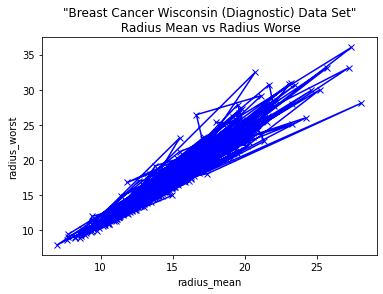

In [38]:
plt.plot(df['radius_mean'], df['radius_worst'], 'bx-')
plt.xlabel('radius_mean')
plt.ylabel('radius_worst')
plt.title('"Breast Cancer Wisconsin (Diagnostic) Data Set"\n Radius Mean vs Radius Worse')
plt.show()

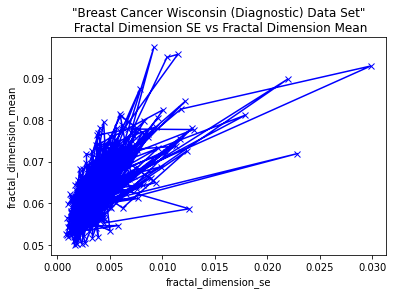

In [52]:
plt.plot(df['fractal_dimension_se'], df['fractal_dimension_mean'], 'bx-')
plt.xlabel('fractal_dimension_se')
plt.ylabel('fractal_dimension_mean')
plt.title('"Breast Cancer Wisconsin (Diagnostic) Data Set"\n Fractal Dimension SE vs Fractal Dimension Mean')
plt.show()

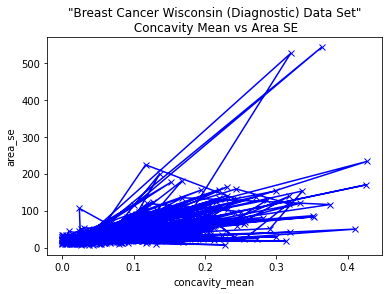

In [54]:
plt.plot(df['concavity_mean'], df['area_se'], 'bx-')
plt.xlabel('concavity_mean')
plt.ylabel('area_se')
plt.title('"Breast Cancer Wisconsin (Diagnostic) Data Set"\n Concavity Mean vs Area SE')
plt.show()

# 2) Perform PCA on your dataset first and *then* use k-means clustering. 

- You need to **standardize** your data before PCA.
- First try **clustering** just on PC1 and PC2 so that you can make a scatterplot of your clustering.
- Then use use a scree plot to decide how many **principal components** to include in your clustering, and use however many principal components you need in order to retain **90%** of the variation of the original dataset.



In [59]:
# check for number of categorical vs numeric columns
cat_cols = df.columns[df.dtypes=='object']
num_cols = df.columns[df.dtypes!='object']

print(f'{len(cat_cols)} categorical columns')
print(f'{len(num_cols)} numerical columns')

0 categorical columns
30 numerical columns


In [ ]:

# We're making a copy of our data in case we mess something up.
df_processed = df.copy()

# Categorically Encode our Variables:
# They need to all be numeric before we do PCA.
# https://pbpython.com/categorical-encoding.html

# Cast categorical columns to "category" data type
df_processed[cat_cols] = df_processed[cat_cols].astype('category')

df_processed.dtypes

#can't concatenate something that isn't there in the first place. 

In [61]:
# Replace all category cell values with their numeric category codes
for col in cat_cols:
  df_processed[col] = df_processed[col].cat.codes

print(df_processed.shape)
df_processed.head()


(569, 30)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [63]:
df.dtypes

radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst       float64
symmetry_worst      

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_processed = scaler.fit_transform(df_processed)
df_processed

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [65]:
from sklearn.decomposition import PCA

# Apply PCA to the data
pca = PCA(.9) #90% Variance. May help with the size of the visualization when it's time to view it. 
pca_features = pca.fit_transform(df_processed)

In [67]:
# Define scree plot function
def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components=len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(18, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va="bottom", ha="center", fontsize=4.5)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

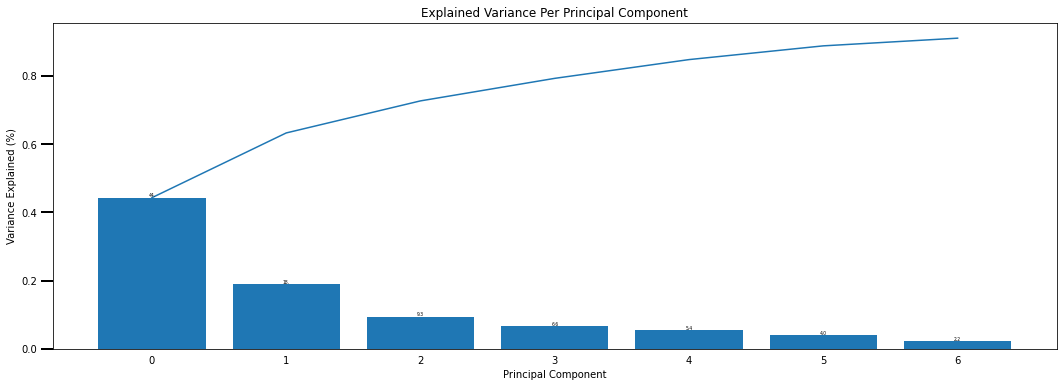

In [68]:
scree_plot(pca)

In [69]:
pca.explained_variance_

array([13.30499079,  5.7013746 ,  2.82291016,  1.98412752,  1.65163324,
        1.20948224,  0.67640888])

# Proportion of Explained Variance for Pc1 

In [70]:
# eigenvalue of PC1 / sum of all eigenvalues
pca.explained_variance_[0] / pca.explained_variance_.sum()

0.4864548314185724

In [71]:
pca.explained_variance_ / pca.explained_variance_.sum()

array([0.48645483, 0.2084527 , 0.10321077, 0.07254334, 0.06038674,
       0.04422089, 0.02473075])

##The PCA Algorith, from sklearn calculates all of the proportions of explained variance for you

In [72]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768,
       0.04024522, 0.02250734])

In [73]:
# How many principal Components do I need from the housing dataset to make up 90% of the variance in the original dataset?

# I need to keep the first 16 principal components in order to
# retain 90% of the variance of the original dataset
pca.explained_variance_ratio_[0:16].sum()

0.9100953006967308

>> Selecting the proportion of explained variance that youwant to retain is built into the sklearn PCA() function as well

In [75]:
# Easier waspca =PCA(.9) #90% variance.
pca_features = pca.fit_transform(df_processed)

pca_features

array([[ 9.19283683,  1.94858307, -1.12316616, ..., -1.19511012,
         1.41142445,  2.15936987],
       [ 2.3878018 , -3.76817174, -0.52929269, ...,  0.62177498,
         0.02865635,  0.01335809],
       [ 5.73389628, -1.0751738 , -0.55174759, ..., -0.1770859 ,
         0.54145215, -0.66816648],
       ...,
       [ 1.25617928, -1.90229671,  0.56273053, ...,  1.80999133,
        -0.53444719, -0.19275823],
       [10.37479406,  1.67201011, -1.87702933, ..., -0.03374193,
         0.56793647,  0.22308167],
       [-5.4752433 , -0.67063679,  1.49044308, ..., -0.18470331,
         1.61783736,  1.69895156]])

#Scatterplot of PC1 vs PC2

In [78]:
df = pd.DataFrame(pca_features)

df.head()

,0,1,2,3,4,5,6
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213


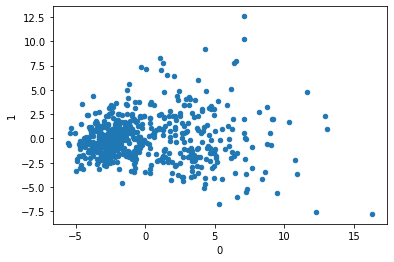

In [89]:
df.plot.scatter(0,1)

In [90]:
df.shape

(569, 7)

In [91]:
zeros = np.zeros(df.shape[0])

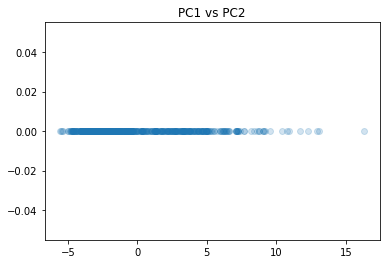

In [92]:
import numpy as np

plt.scatter(df[0], zeros, alpha=.2)
plt.title("PC1 vs PC2")
plt.show()

Given a set of points in n-dimensional space we want to :

1) select k random points to act as initial centroids (one point for each cluster)

2) Find the cluster of points surrounding that centroid (assign points to the centroid that they lie closest to)

3) (Re)Calculate a new centroid for the cluster

Repeat steps 2 & 3 until the model converges. (Clusters don't change)

In [95]:
centroids = df.sample(3)
centroids.head()

,0,1,2,3,4,5,6,clusters
501,2.790400,3.385561,-0.753076,-1.333182,-1.585532,-0.508418,0.207163,2
190,6.523117,8.011170,-0.326424,-2.771799,1.598932,3.672119,0.467200,2
26,3.510263,2.171625,-3.894546,-1.295760,-0.068218,0.787357,0.289919,2


AttributeError: ignored

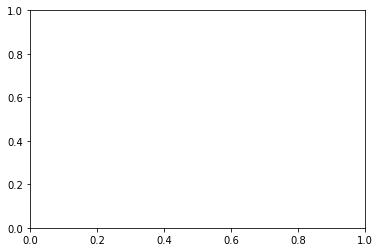

In [96]:
ax = plt.subplot(1,1,1)
ax.scatter(df.x, df.y)
ax.plot(centroids.iloc[0].x, centroids.iloc[0].y, "or")
ax.plot(centroids.iloc[1].x, centroids.iloc[1].y, "og")
ax.plot(centroids.iloc[2].x, centroids.iloc[2].y, "oy")
plt.show()

In [85]:
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_processed)
labels = kmeans.labels_

print(labels)

[0 0 0 2 0 2 0 2 2 2 1 2 0 1 2 2 1 2 0 1 1 1 2 0 0 0 2 0 2 0 0 2 0 0 2 2 2
 1 1 2 1 2 0 2 1 0 1 2 1 1 1 1 1 0 1 1 0 2 1 1 1 1 2 1 2 2 1 1 2 1 0 2 2 1
 1 0 1 0 0 1 1 2 0 0 1 0 1 0 1 2 1 1 1 1 2 0 1 1 1 2 1 1 1 1 1 2 1 1 0 1 1
 2 2 1 1 1 1 2 2 1 1 0 0 1 1 1 1 0 2 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 2 2 1
 1 1 1 2 2 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 2 1 1 1 2 2 1 1 0 0 1 1 1
 1 1 1 1 1 2 1 1 2 2 1 2 0 0 2 1 0 0 2 1 1 1 1 2 1 0 1 0 2 2 2 2 1 0 0 1 1
 1 2 1 1 1 1 1 2 2 1 1 0 1 1 0 0 1 0 1 1 2 1 0 1 1 2 1 1 0 1 0 1 0 1 0 2 0
 2 0 1 0 1 0 0 1 1 1 2 1 1 0 1 1 1 1 1 1 1 0 1 0 2 1 1 1 1 2 1 2 1 1 1 1 1
 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 1 1 0 1 0 1 1 1 1 2 2 2 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 2 0 2 1 1 2 1 1 1 1 1 1 1 1 0 0 1 0 0
 2 1 0 0 1 1 2 1 1 2 1 1 1 2 1 1 1 1 2 0 1 1 2 0 1 1 1 1 1 1 2 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 0 1 1 1 2 1 1 1 1 1 1 1 1 2 1 0 0 1 2 1 1 1 1 2 0 1 1
 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 2 1 1 0 2 1 1 1 1 1 1 1 1 1 2 1
 1 1 1 1 2 1 0 1 1 1 1 0 

In [93]:
# Add our new labels to the dataframe
new_series = pd.Series(labels)
df['clusters'] = new_series.values

df.head()

,0,1,2,3,4,5,6,clusters
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,0
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,2
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0


In [94]:
# We might get unlucky with different centroids and have slightly different clusters.
centroids = get_centroids(df, 'clusters')
plot_clusters(df, 'clusters', centroids)

NameError: ignored

## Check you work: 

This is something that in a truly unsupervised learning situation **WOULD NOT BE POSSIBLE**. But for educational purposes go back and grab the true diagnosis column (label) from the original dataset. Take your cluster labels and compare them to the original diagnosis column. You can make scatterplots for each to see how they compare or you can calculate a percent accuracy score like: 
\begin{align}
\frac{\text{Num Correct Labels}}{\text{Num Total Observations}}
\end{align}

In [ ]:
# Your Code Here

In [ ]:
##### Your Code Here #####

## Check your work: 

- Compare your PC1, PC2 clustering scatterplot to the clustering scatterplots you made on the raw data
- Calculate accuracy scores for both the PC1,PC2 Principal component clustering and the 90% of explained variance clustering.

How do your accuracy scores -when preprocessing the data with PCA- compare to the accuracy when simply clustering on the raw data?

# Stretch Goals:

- Study for the Sprint Challenge
- Work on your Data Storytelling Project